<a href="https://colab.research.google.com/github/devinbates/Bitcoin_History/blob/master/Blockcypher_Data_for_Bitcoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Goal of this notebook is to get Bitcoin Block Chain information. The information will be saved to a CSV file and uploaded to Google Drive.
As of March 2020 there is a 200/hr quote.


Mount Drive 

In [0]:
from google.colab import drive
drive.mount('drive')

In [0]:
!pip install blockcypher -q #install blockcypher

In [0]:
import blockcypher #import

> Important block header fields to grab from Blockcypher.

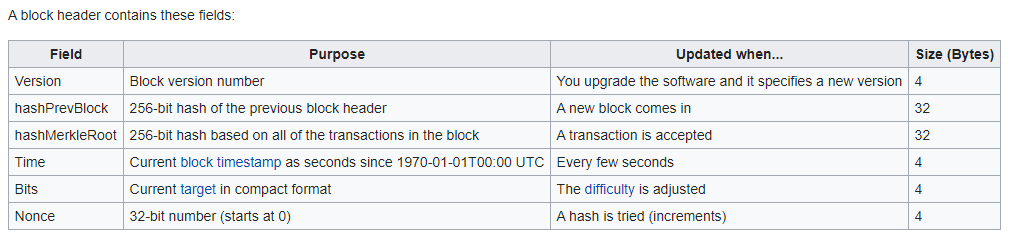

Proof of concept. Uncomment to check.

In [0]:
# version = blockcypher.get_block_overview('125552')['ver']
# hashprevblock = blockcypher.get_block_overview('125552')['prev_block']
# hashMerkleRoot = blockcypher.get_block_overview('125552')['mrkl_root']
# print(version)
# print(hashprevblock)
# print(hashMerkleRoot)

Calculate Hash using the data collected from 

In [0]:
import pandas as pd

In [0]:
block_index = 125943
blocks_to_get = 200
i = block_index
last_block = block_index + blocks_to_get

block_chain_df = pd.DataFrame()
for i in xrange(block_index,last_block):

  try:
      block_overview = blockcypher.get_block_overview(str(i))
      #get header elements
      block_num = i
      b_version = hexify(block_overview['ver'],'<L')
      
      b_prevhash = block_overview['prev_block']
      
      b_mklroot = block_overview['mrkl_root']
      
      b_time = calendar.timegm(block_overview['time'].timetuple()) #converts time
      
      b_bits = block_overview['bits']
      
      b_nonce = block_overview['nonce']


      df_add = pd.DataFrame({"Block":block_num,
        "Version":b_version, "PreviousHash": b_prevhash,"MerkelRoot":b_mklroot,"TimeStamp":b_time,"Bits":b_bits,"Nonce":b_nonce}, index=[0])
      block_chain_df = block_chain_df.append(df_add)
      print(i)
      print(b_nonce)
  except:
    print("block ", i," might not exist")

In [0]:
block_chain_df.head()

In [0]:
block_chain_df.to_csv('block_chain_df.csv')
!cp block_chain_df.csv "drive/My Drive/"